In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [64]:
df = pd.read_csv('../data/us-retail-sales.csv')
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [65]:
df['Month'] = pd.to_datetime(df['Month'])

In [66]:
df = df[['Month',"Clothing"]]
df = df[df.Month>=pd.to_datetime('2014-12-01')]

In [24]:
df['lag_1'] = df['Clothing'].shift(1)
df['lag_2'] = df['Clothing'].shift(2)
df['lead_1'] = df['Clothing'].shift(-1)

In [25]:
df['Centered_MA'] = (df['Clothing'] + df['lead_1'] + df['lag_1'])/3

In [26]:
df['Trailing_MA'] = (df['Clothing'] + df['lag_1'] + df['lag_2'])/3

In [33]:
display(df)

,Month,Clothing,lag_1,lag_2,lead_1,Centered_MA,Trailing_MA
275,2014-12-01,32760,NaN,NaN,15840.0,NaN,NaN
276,2015-01-01,15840,32760.0,NaN,18079.0,22226.333333,NaN
277,2015-02-01,18079,15840.0,32760.0,20819.0,18246.000000,22226.333333
278,2015-03-01,20819,18079.0,15840.0,20470.0,19789.333333,18246.000000
279,2015-04-01,20470,20819.0,18079.0,22239.0,21176.000000,19789.333333
...,...,...,...,...,...,...,...
331,2019-08-01,23829,21742.0,21116.0,19567.0,21712.666667,22229.000000
332,2019-09-01,19567,23829.0,21742.0,21400.0,21598.666667,21712.666667
333,2019-10-01,21400,19567.0,23829.0,25170.0,22045.666667,21598.666667
334,2019-11-01,25170,21400.0,19567.0,35157.0,27242.333333,22045.666667


f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

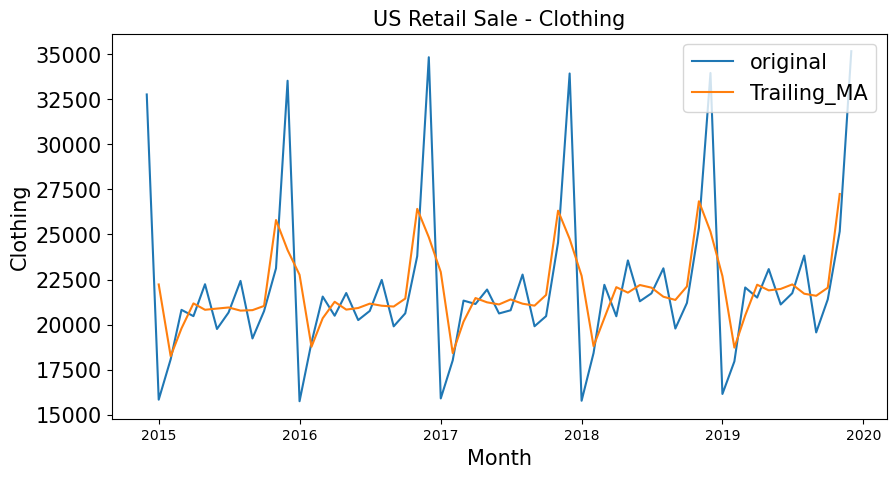

In [41]:
plt.figure(figsize=(10,5))
plt.title("US Retail Sale - Clothing", fontsize=15)
sns.lineplot(x='Month', y='Clothing', data=df, label='original')
# sns.lineplot(x='Month', y='Centered_MA', data=df, label='Centered_MA')
sns.lineplot(x='Month', y='Centered_MA', data=df, label='Trailing_MA')
plt.xlabel('Month',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Clothing',fontsize=15)
plt.legend(fontsize=15)

In [45]:
df['Clothing'].rolling(window=3, center=False).mean()

275             NaN
276             NaN
277    22226.333333
278    18246.000000
279    19789.333333
           ...     
331    22229.000000
332    21712.666667
333    21598.666667
334    22045.666667
335    27242.333333
Name: Clothing, Length: 61, dtype: float64

In [178]:
df = pd.read_csv('../data/us-retail-sales.csv')
df['Month'] = pd.to_datetime(df['Month'])
df = df[['Month','BuildingMaterials']]

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, '6-MA')

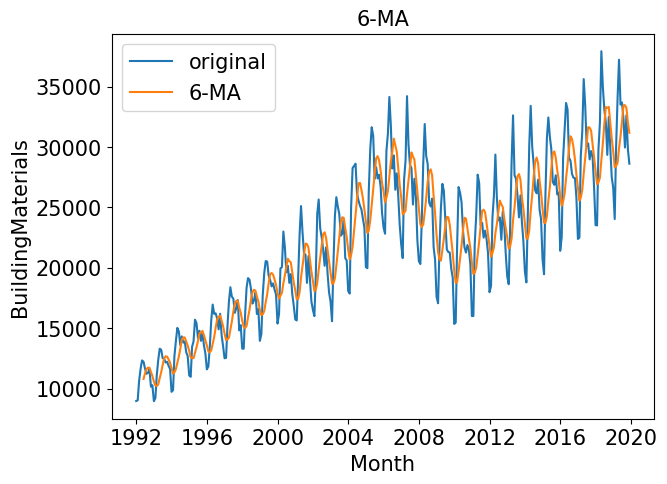

In [179]:
fig1 = plt.figure(figsize=(7,5))
df['BuildingMaterials_MA'] = df['BuildingMaterials'].rolling(window=6, center=False).mean()
sns.lineplot(x='Month', y='BuildingMaterials', data=df, label='original')
sns.lineplot(x='Month', y='BuildingMaterials_MA', data=df, label='6-MA')
plt.xlabel('Month',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BuildingMaterials',fontsize=15)
plt.legend(fontsize=15)
plt.title('6-MA', fontsize=15)

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, '12-MA')

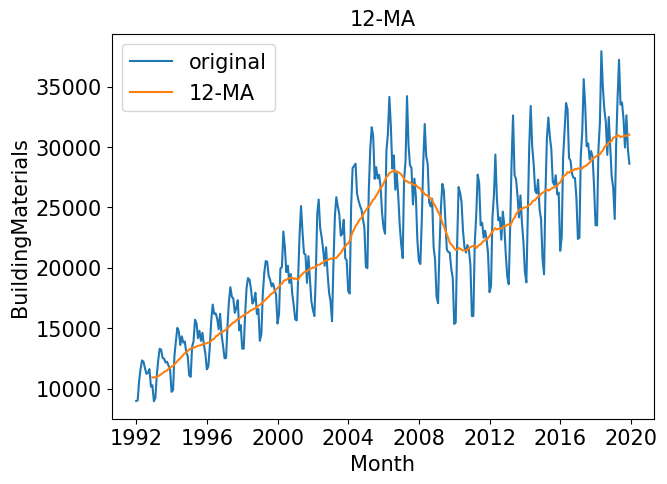

In [182]:
fig2 = plt.figure(figsize=(7,5))
df['BuildingMaterials_MA'] = df['BuildingMaterials'].rolling(window=12, center=False).mean()
sns.lineplot(x='Month', y='BuildingMaterials', data=df, label='original')
sns.lineplot(x='Month', y='BuildingMaterials_MA', data=df, label='12-MA')
plt.xlabel('Month',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BuildingMaterials',fontsize=15)
plt.legend(fontsize=15)
plt.title('12-MA', fontsize=15)

In [224]:
from statsmodels.api import tsa

In [ ]:
fig3= plt.figure(figsize=(7,5))
df['ExponentialSmoothing'] = df['BuildingMaterials'].ewm(alpha=0.3, adjust=False).mean()
sns.lineplot(x='Month', y='BuildingMaterials', data=df, label='original')
sns.lineplot(x='Month', y='ExponentialSmoothing', data=df, label='ExponentialSmoothing')
plt.xlabel('Month',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BuildingMaterials',fontsize=15)
plt.legend(fontsize=15)
plt.title('ExponentialSmoothing', fontsize=15)

In [204]:
def exponential_smoothing(Y, alpha):
    S = np.zeros(Y.shape[0])
    S[0] = Y[0]
    for t in range(1, Y.shape[0]):
        S[t] = alpha * Y[t] + (1- alpha) * S[t-1]
    return S

In [226]:
df = pd.read_csv('../data/us-retail-sales.csv')
df['Month'] = pd.to_datetime(df['Month'])
df = df[['Month','BuildingMaterials']]

In [227]:
es = tsa.SimpleExpSmoothing(df['BuildingMaterials'])
es.fit(smoothing_level=0.3)

C:\Users\duclh3\AppData\Roaming\Python\Python310\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [219]:
df['ExponentialSmoothing_PANDAS'] = df['BuildingMaterials'].ewm(alpha=0.3, adjust=False).mean()
df['ExponentialSmoothing_FUNCTION'] = exponential_smoothing(df['BuildingMaterials'], 0.3)
df['ExponentialSmoothing_TSA'] = es.predict(es.params,start=1,end=df.shape[0])

In [228]:
es.fittedvalues

AttributeError: 'SimpleExpSmoothing' object has no attribute 'fittedvalues'

In [229]:
from statsmodels.api import tsa

In [230]:
model = sm.tsa.SimpleExpSmoothing(df['BuildingMaterials'])
ses_model = model.fit(smoothing_level=0.3)
df['Forecast'] = ses_model.fittedvalues

C:\Users\duclh3\AppData\Roaming\Python\Python310\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [231]:
df

,Month,BuildingMaterials,Forecast
0,1992-01-01,8964,8964.000000
1,1992-02-01,9023,8964.000000
2,1992-03-01,10608,8981.700000
3,1992-04-01,11630,9469.590000
4,1992-05-01,12327,10117.713000
...,...,...,...
331,2019-08-01,32375,32910.114856
332,2019-09-01,29963,32749.580399
333,2019-10-01,32629,31913.606280
334,2019-11-01,29793,32128.224396
